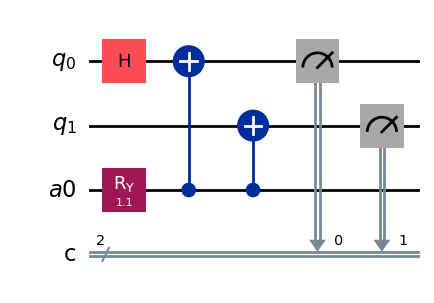

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister

qr = QuantumRegister(2,'q')
ar = AncillaRegister(1)
# ar = QuantumRegister(1,'a')
cr = ClassicalRegister(2,'c')

qc = QuantumCircuit(qr,ar,cr)
qc.h(0)
qc.ry(1.1,2)
qc.cx(2,0)
qc.cx(2,1)

qc.measure([0,1],[0,1])
qc.draw('mpl')

In [15]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

sim = AerSimulator()
qct = transpile(qc,sim)
job = sim.run(qct,shots=100)
result = job.result()
counts= result.get_counts()

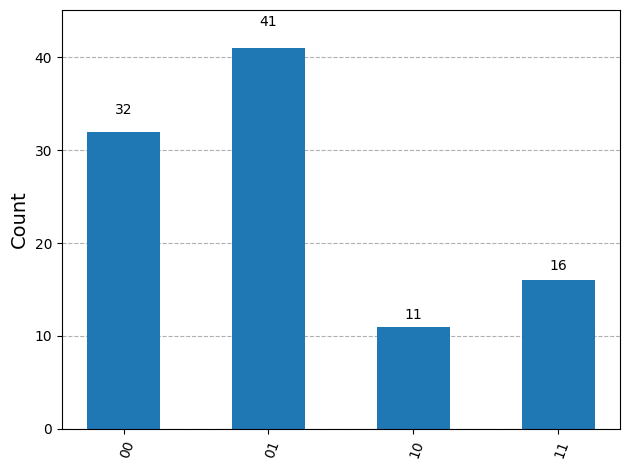

In [16]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [17]:
from qiskit import transpile, generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2, SamplerOptions

service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
print(backend.name)

ibm_torino


In [18]:
options = SamplerOptions(default_shots=100, max_execution_time=60)
sampler = SamplerV2(mode = backend,options = options)

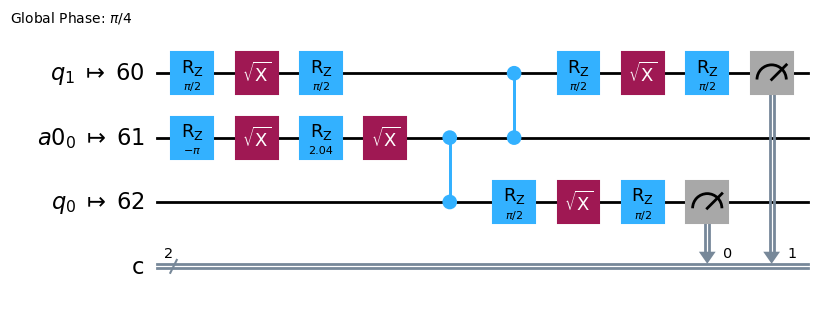

In [23]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1,seed_transpiler=145)
qc_isa = pm.run(qc)
qc_isa.draw('mpl')

In [24]:
job = sampler.run([qc_isa])

In [25]:
results2 = job.result()[0]
counts2 = results2.join_data().get_counts()

RuntimeJobFailureError: "Unable to retrieve job result. TypeError: unsupported operand type(s) for -: 'NoneType' and 'int"

In [ ]:
plot_histogram(counts2)